<a href="https://colab.research.google.com/github/NotSrihan/CS290/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame( iris.data, columns = iris.feature_names)

In [5]:
df["species"] = iris.target

In [6]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species_name'] = df['species'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


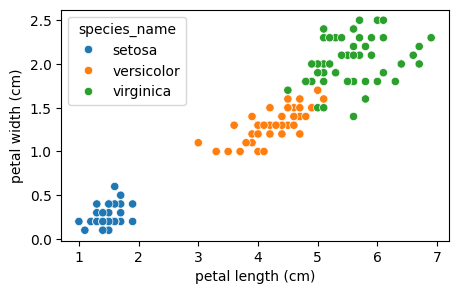

In [7]:
plt.figure(figsize=(5, 3))
sns.scatterplot( x = "petal length (cm)", y = "petal width (cm)", data = df, hue = "species_name");

In [8]:
centroids = df.groupby("species_name")[["petal length (cm)", "petal width (cm)"]].mean()

In [9]:
centroids

,petal length (cm),petal width (cm)
species_name,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


In [10]:
centroids.loc["versicolor"]

,versicolor
petal length (cm),4.260
petal width (cm),1.326


In [11]:
# method = input("Choose centroid initialization method ('random' or 'specified'): ").strip().lower()

In [12]:
def initialize_centroids(X, k, method, specified_centroids=None):
    if method == 'random':
        centroids = X.sample(n=k).values
    elif method == 'specified' and specified_centroids is not None:
        centroids = np.array(specified_centroids)
    return centroids

In [13]:
# def kmeans(X, k, method='random', specified_centroids=None, max_iters=100, tol=1e-4):
#     centroids = initialize_centroids(X, k, method, specified_centroids)
#     prev_centroids = np.zeros_like(centroids)

#     # List to store the history of centroid positions for plotting
#     centroids_history = []

#     for i in range(max_iters):

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment


In [15]:

def k_means_clustering(data, k, max_iters=100, init_centroids=None, random_state=None):
    np.random.seed(random_state)


In [16]:
def plot_clusters(data, centroids, labels, iteration, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label+1}")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
    plt.title(f"{title} - Iteration {iteration}")
    plt.legend()
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(iris_data)
    inertia = kmeans_model.inertia_
    print(f"Inertia: {inertia}")
    plt.show()


In [17]:

def k_means_clustering(data, k, max_iters=50, init_centroids=None, random_state=None):
    np.random.seed(random_state)


    if init_centroids is None:
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    else:
        centroids = init_centroids

    for iteration in range(max_iters):
        labels = pairwise_distances_argmin(data, centroids)


        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])


        plot_clusters(data, new_centroids, labels, iteration + 1, "K-Means Clustering")

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids


    return centroids, labels

Inertia: 102.62862638978046


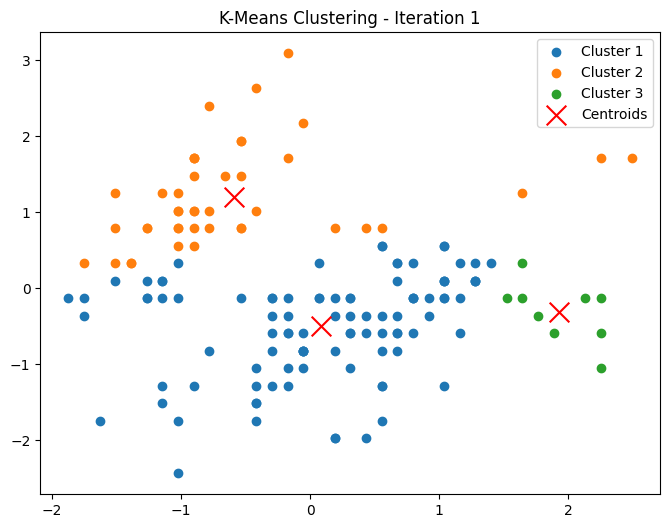

Inertia: 102.62862638978046


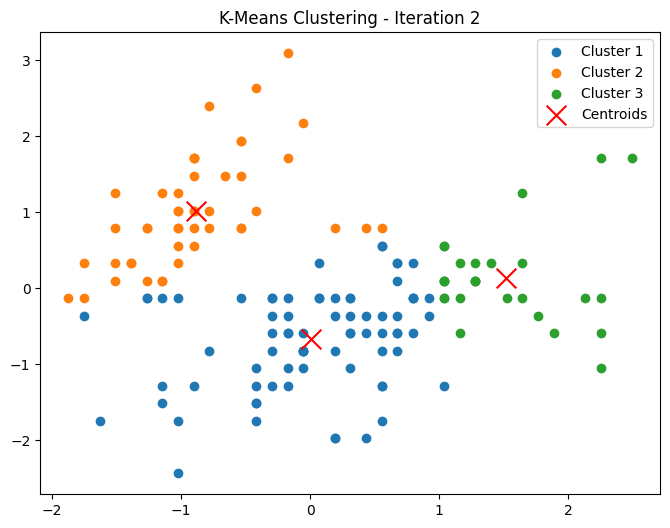

Inertia: 102.62862638978046


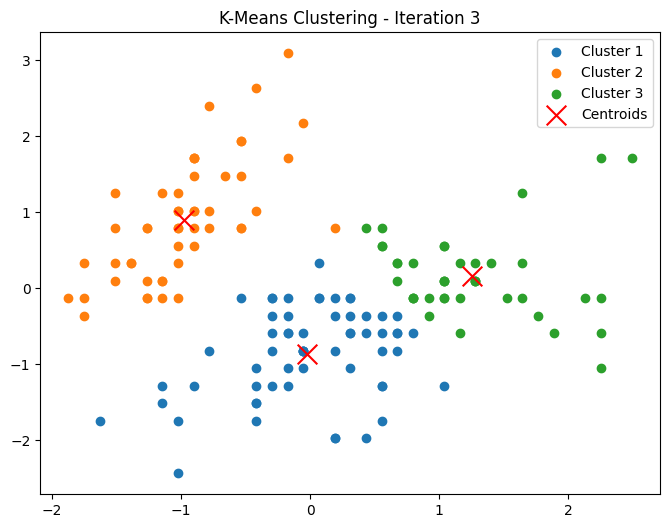

Inertia: 102.62862638978046


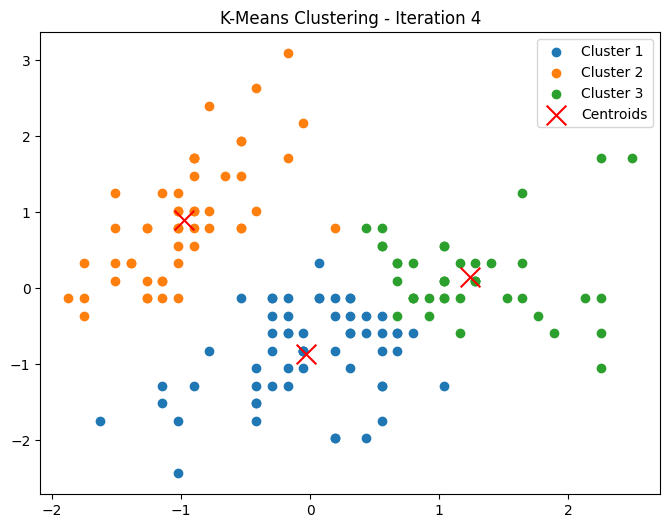

Inertia: 102.62862638978046


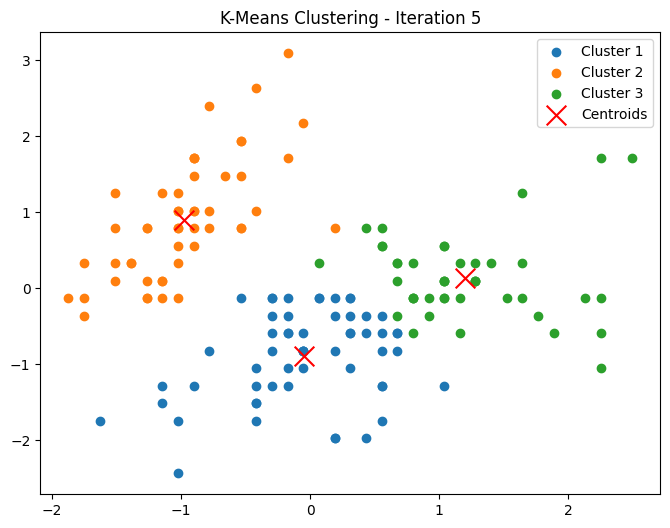

Inertia: 102.62862638978046


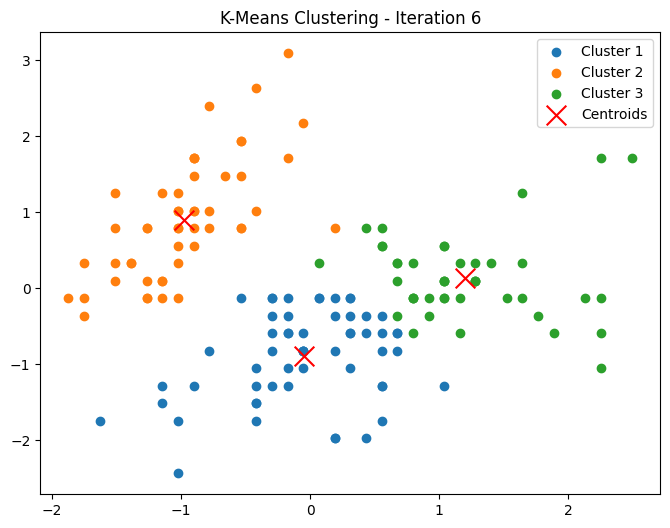

In [18]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_data = iris_data[:, :2]

scaler = StandardScaler()
iris_data = scaler.fit_transform(iris_data)


k = 3
final_centroids, final_labels = k_means_clustering(iris_data, k, random_state=42)



K-Means with k-means++ Initialization


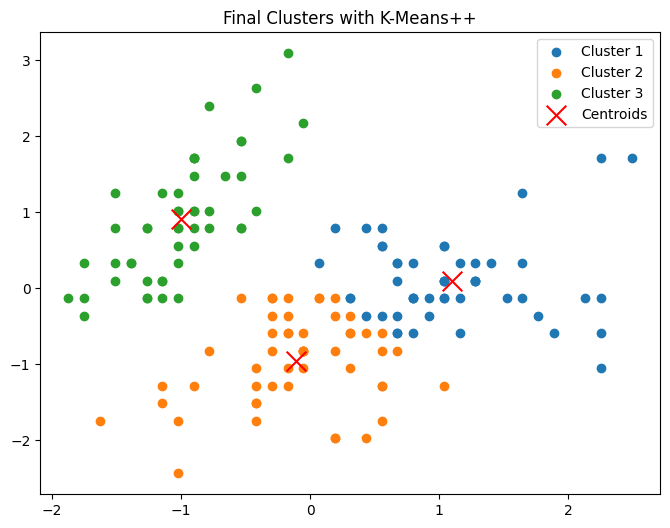

In [19]:
def initialize_centroids_kmeanspp(data, k, random_state=None):
    """
    Initializes centroids using the k-means++ method.
    """
    np.random.seed(random_state)
    n_samples, n_features = data.shape
    centroids = np.zeros((k, n_features))


    centroids[0] = data[np.random.choice(n_samples)]

    for i in range(1, k):
        distances = np.min([np.linalg.norm(data - c, axis=1) for c in centroids[:i]], axis=0)
        probabilities = distances**2 / np.sum(distances**2)
        next_centroid_index = np.random.choice(n_samples, p=probabilities)
        centroids[i] = data[next_centroid_index]

    return centroids


def k_means_clustering(data, k, max_iters=50, init_method="random", random_state=None):
    if init_method == "kmeans++":
        centroids = initialize_centroids_kmeanspp(data, k, random_state)
    elif init_method == "random":
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    else:
        raise ValueError("Unsupported initialization method")

    for iteration in range(max_iters):
        labels = pairwise_distances_argmin(data, centroids)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids

    return centroids, labels


iris = load_iris()
iris_data = iris.data[:, :2]
scaler = StandardScaler()
iris_data = scaler.fit_transform(iris_data)


print("K-Means with k-means++ Initialization")
k = 3
centroids, labels = k_means_clustering(iris_data, k, init_method="kmeans++", random_state=42)


def plot_clusters(data, centroids, labels, title="K-Means Clustering"):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label+1}")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
    plt.title(title)

    plt.legend()
    plt.show()

plot_clusters(iris_data, centroids, labels, title="Final Clusters with K-Means++")

In [26]:
def evaluate_clustering_accuracy(true_labels, predicted_labels):
    # Create a confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    # Use Hungarian algorithm to maximize accuracy
    row_ind, col_ind = linear_sum_assignment(-cm)
    accuracy = cm[row_ind, col_ind].sum() / len(true_labels)
    return accuracy

# Compute accuracy for your clustering
accuracy = evaluate_clustering_accuracy(iris.target, labels)
print(f"Clustering Accuracy: {accuracy:.2f}")

Clustering Accuracy: 0.78


For penguin dataset

In [20]:
pip install palmerpenguins


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_score



In [22]:
def plot_clusters(data, centroids, labels, iteration, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label+1}")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
    plt.title(f"{title} - Iteration {iteration}")
    plt.legend()
    plt.xlabel("Feature 1 (Standardized)")
    plt.ylabel("Feature 2 (Standardized)")
    plt.show()

In [23]:
def k_means_clustering(data, k, max_iters=50, init_centroids=None, random_state=None):
    np.random.seed(random_state)

    if init_centroids is None:
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    else:
        centroids = init_centroids

    for iteration in range(max_iters):
        labels = pairwise_distances_argmin(data, centroids)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        plot_clusters(data, new_centroids, labels, iteration + 1, "K-Means Clustering")

        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids

    return centroids, labels

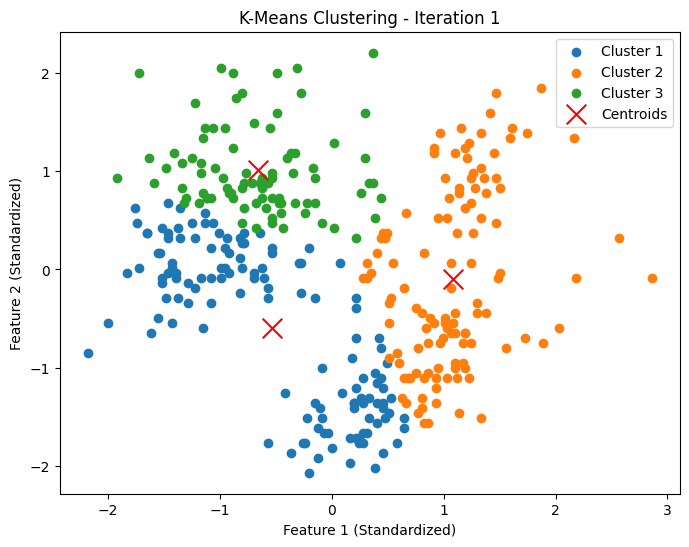

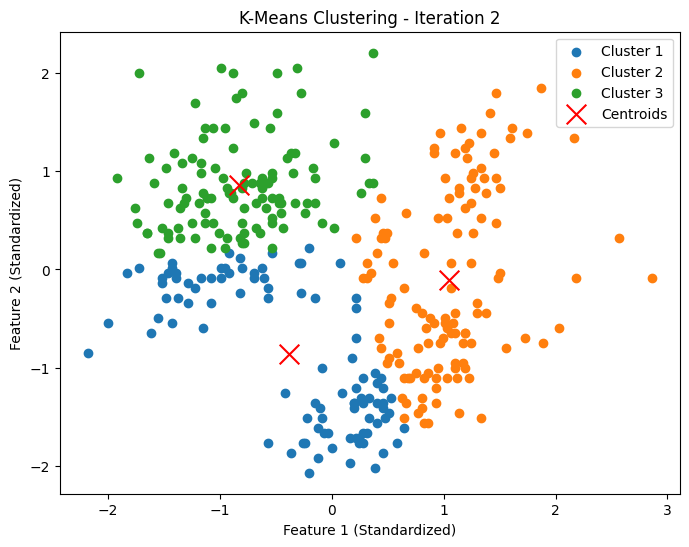

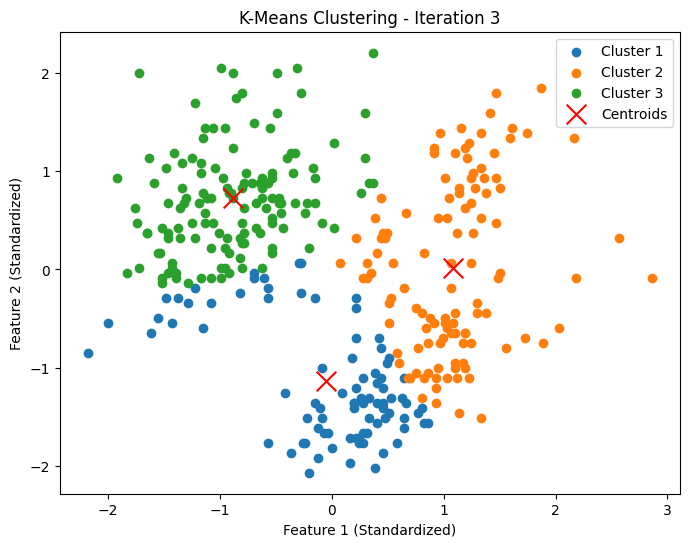

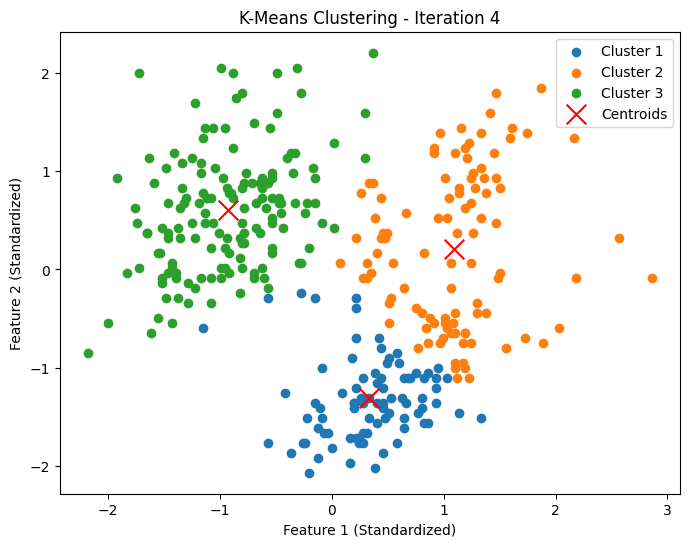

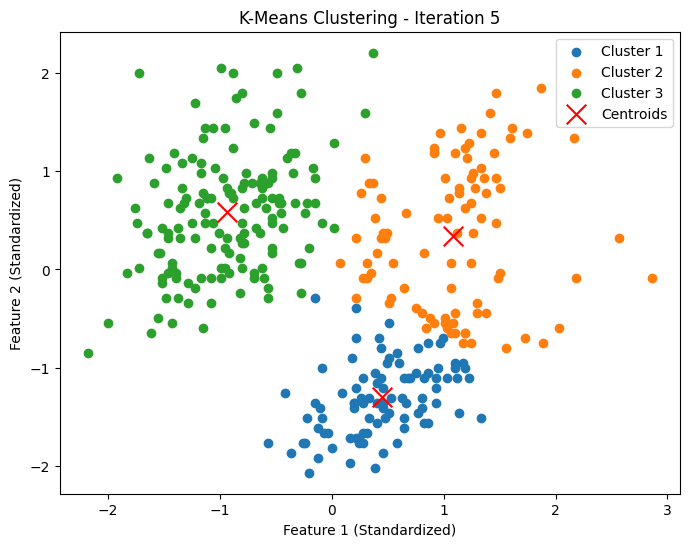

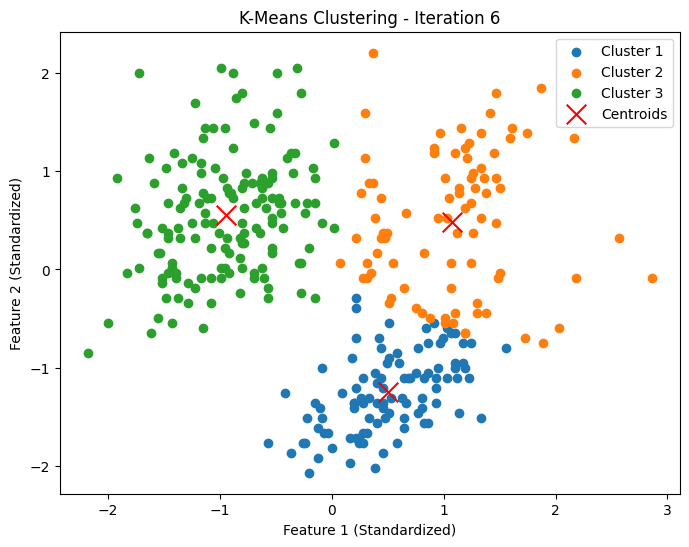

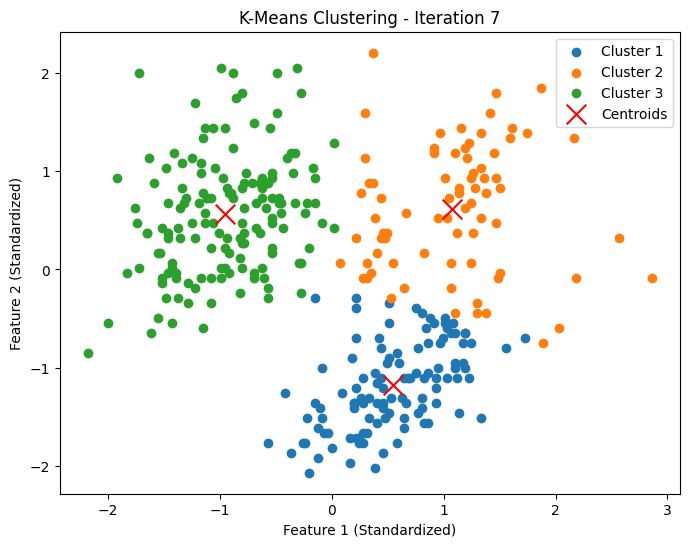

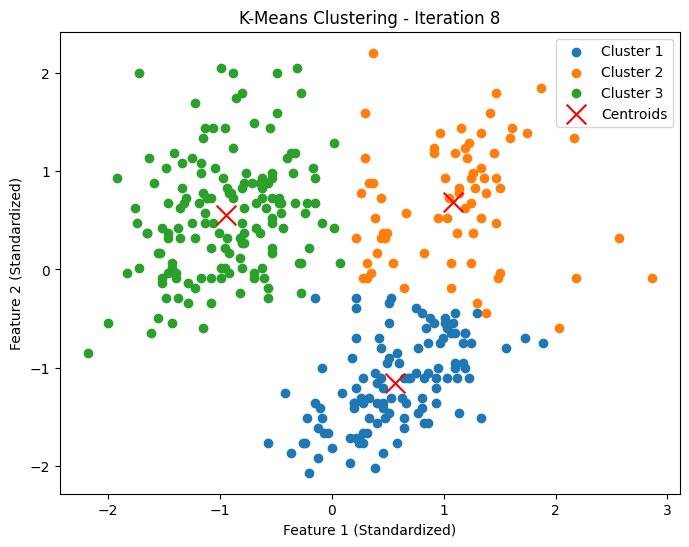

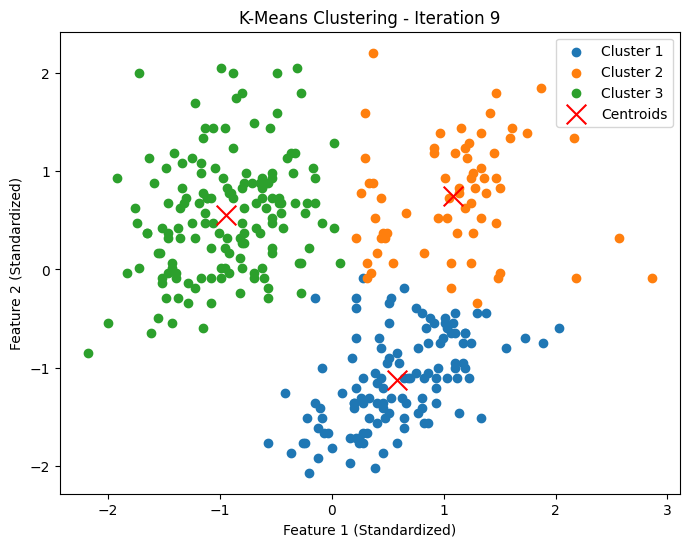

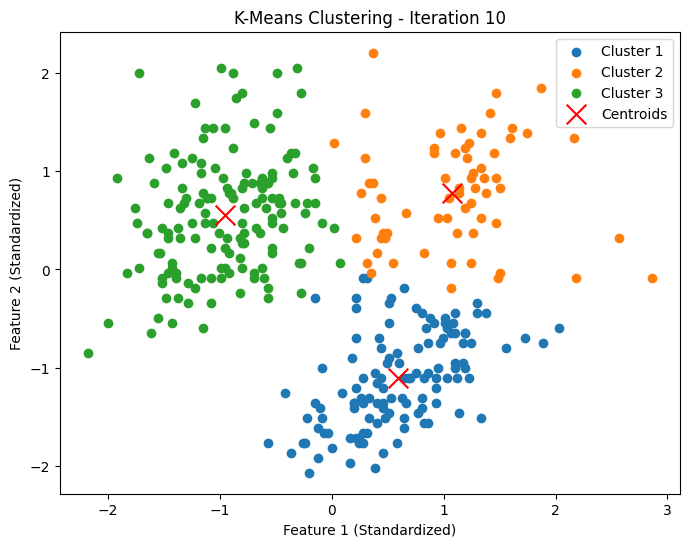

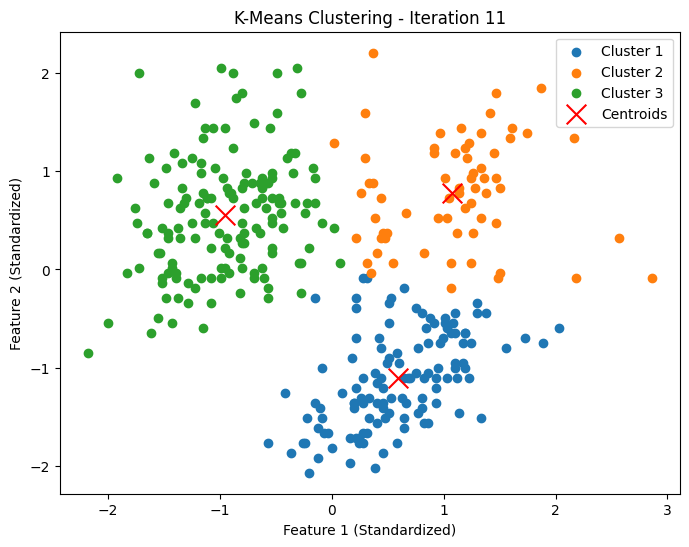

Silhouette Score: 0.5214728002635389


In [24]:
# Load the penguins dataset
penguins = load_penguins()

# Drop rows with missing values
penguins = penguins.dropna()

# Select features for clustering
features = penguins[["bill_length_mm", "bill_depth_mm"]].values

# Standardize the data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Apply k-means clustering
k = 3
final_centroids, final_labels = k_means_clustering(features, k, random_state=42)

# Calculate silhouette score
silhouette_avg = silhouette_score(features, final_labels)
print(f"Silhouette Score: {silhouette_avg}")